In [ ]:
!nvidia-smi

Sat Jul  8 11:56:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="1bvpLdJ9aEjEyL27fAq0")
project = rf.workspace("ealpr").project("arial-airport-planes-detection")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Arial-Airport-planes-Detection-1 in yolov8:: 100%|██████████| 4354/4354 [00:01<00:00, 2509.48it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:01<00:00, 18.0MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Arial-Airport-planes-Detection-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch5160.jpg
events.out.tfevents.1688817478.eb483052aa47.3267.0  train_batch5161.jpg
F1_curve.png					    train_batch5162.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


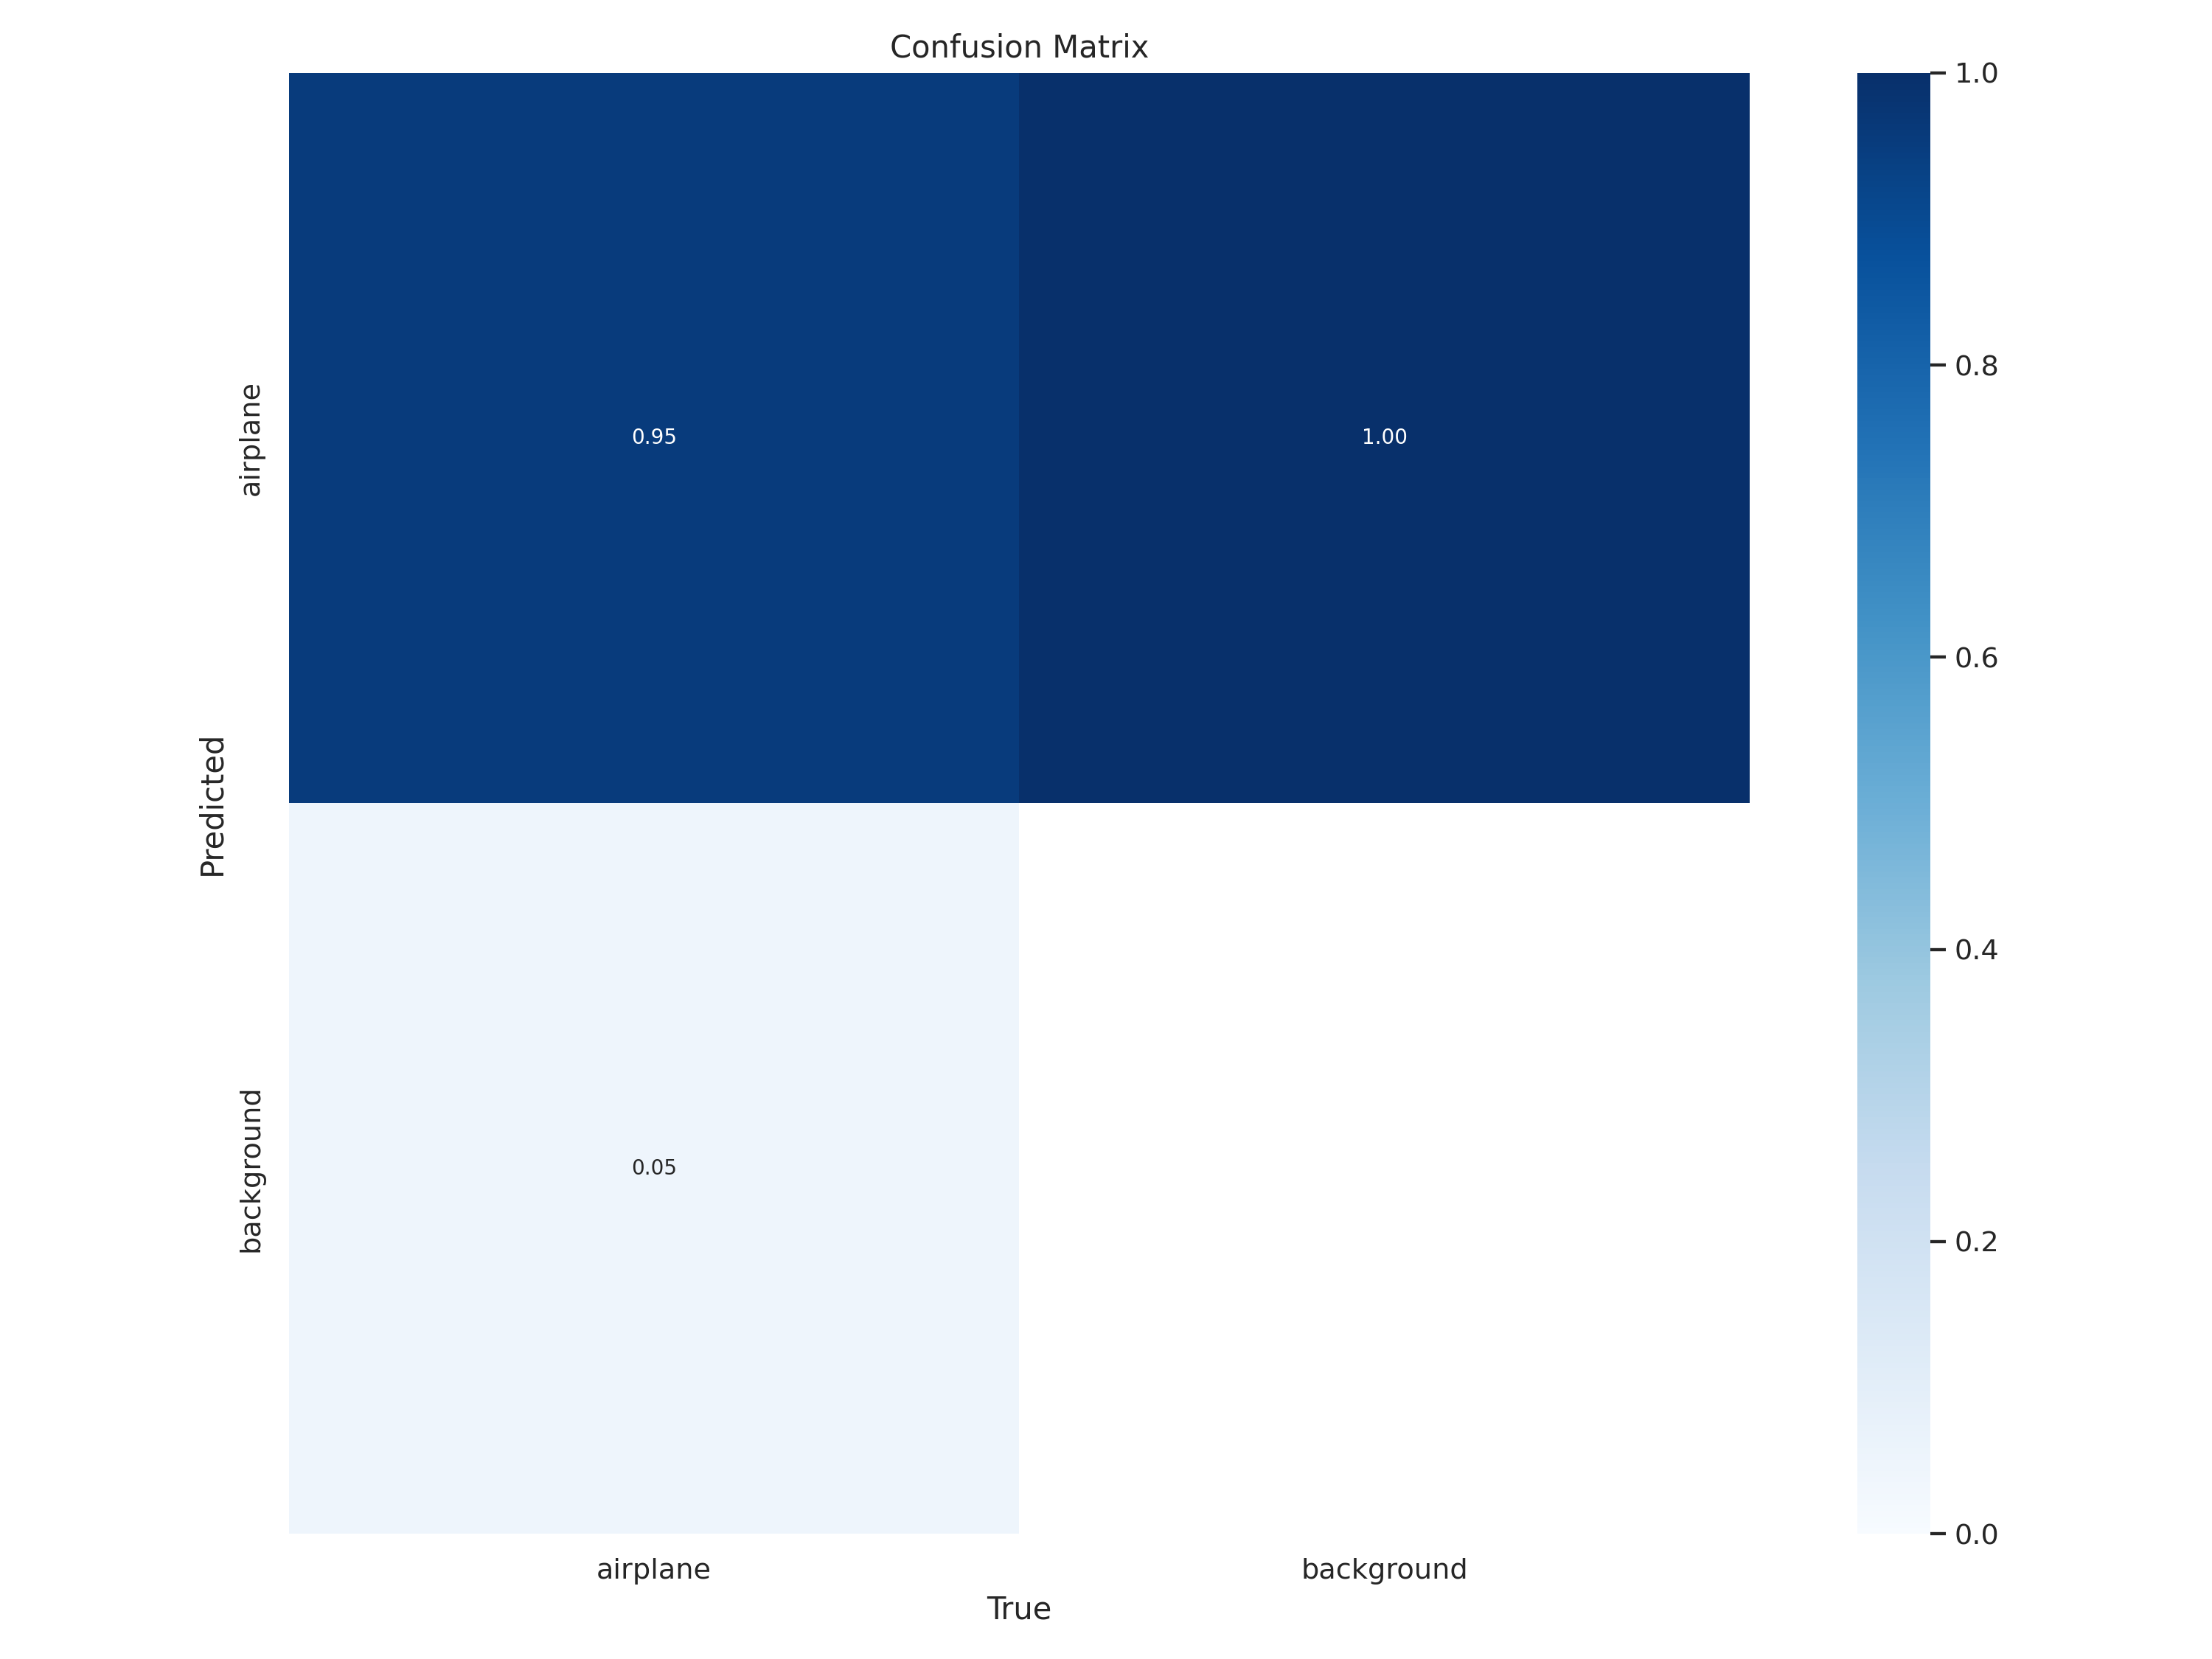

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


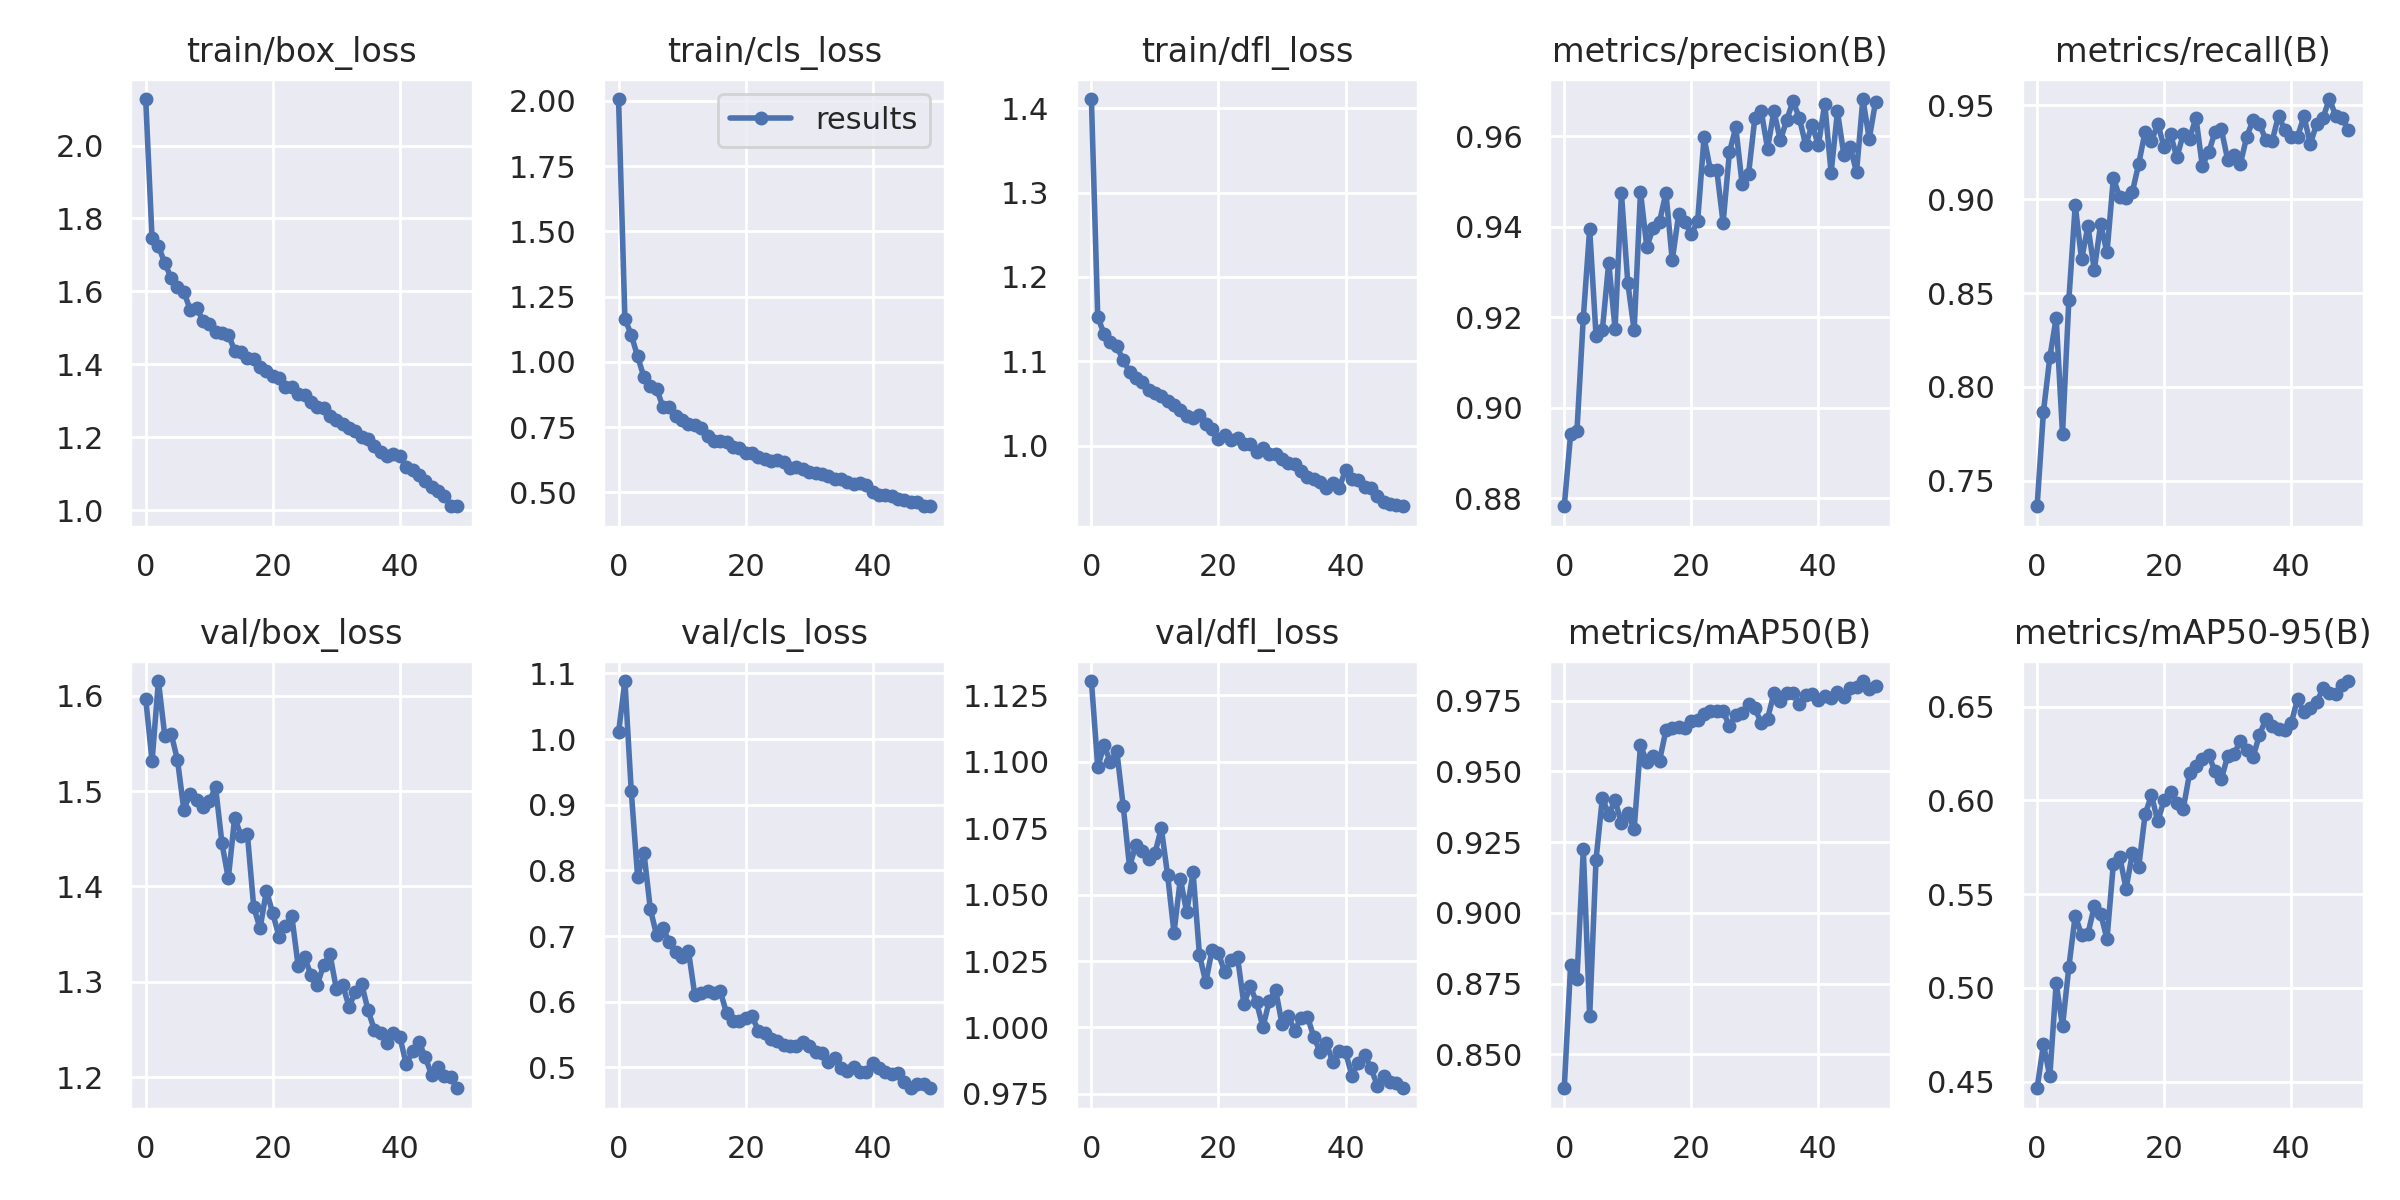

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


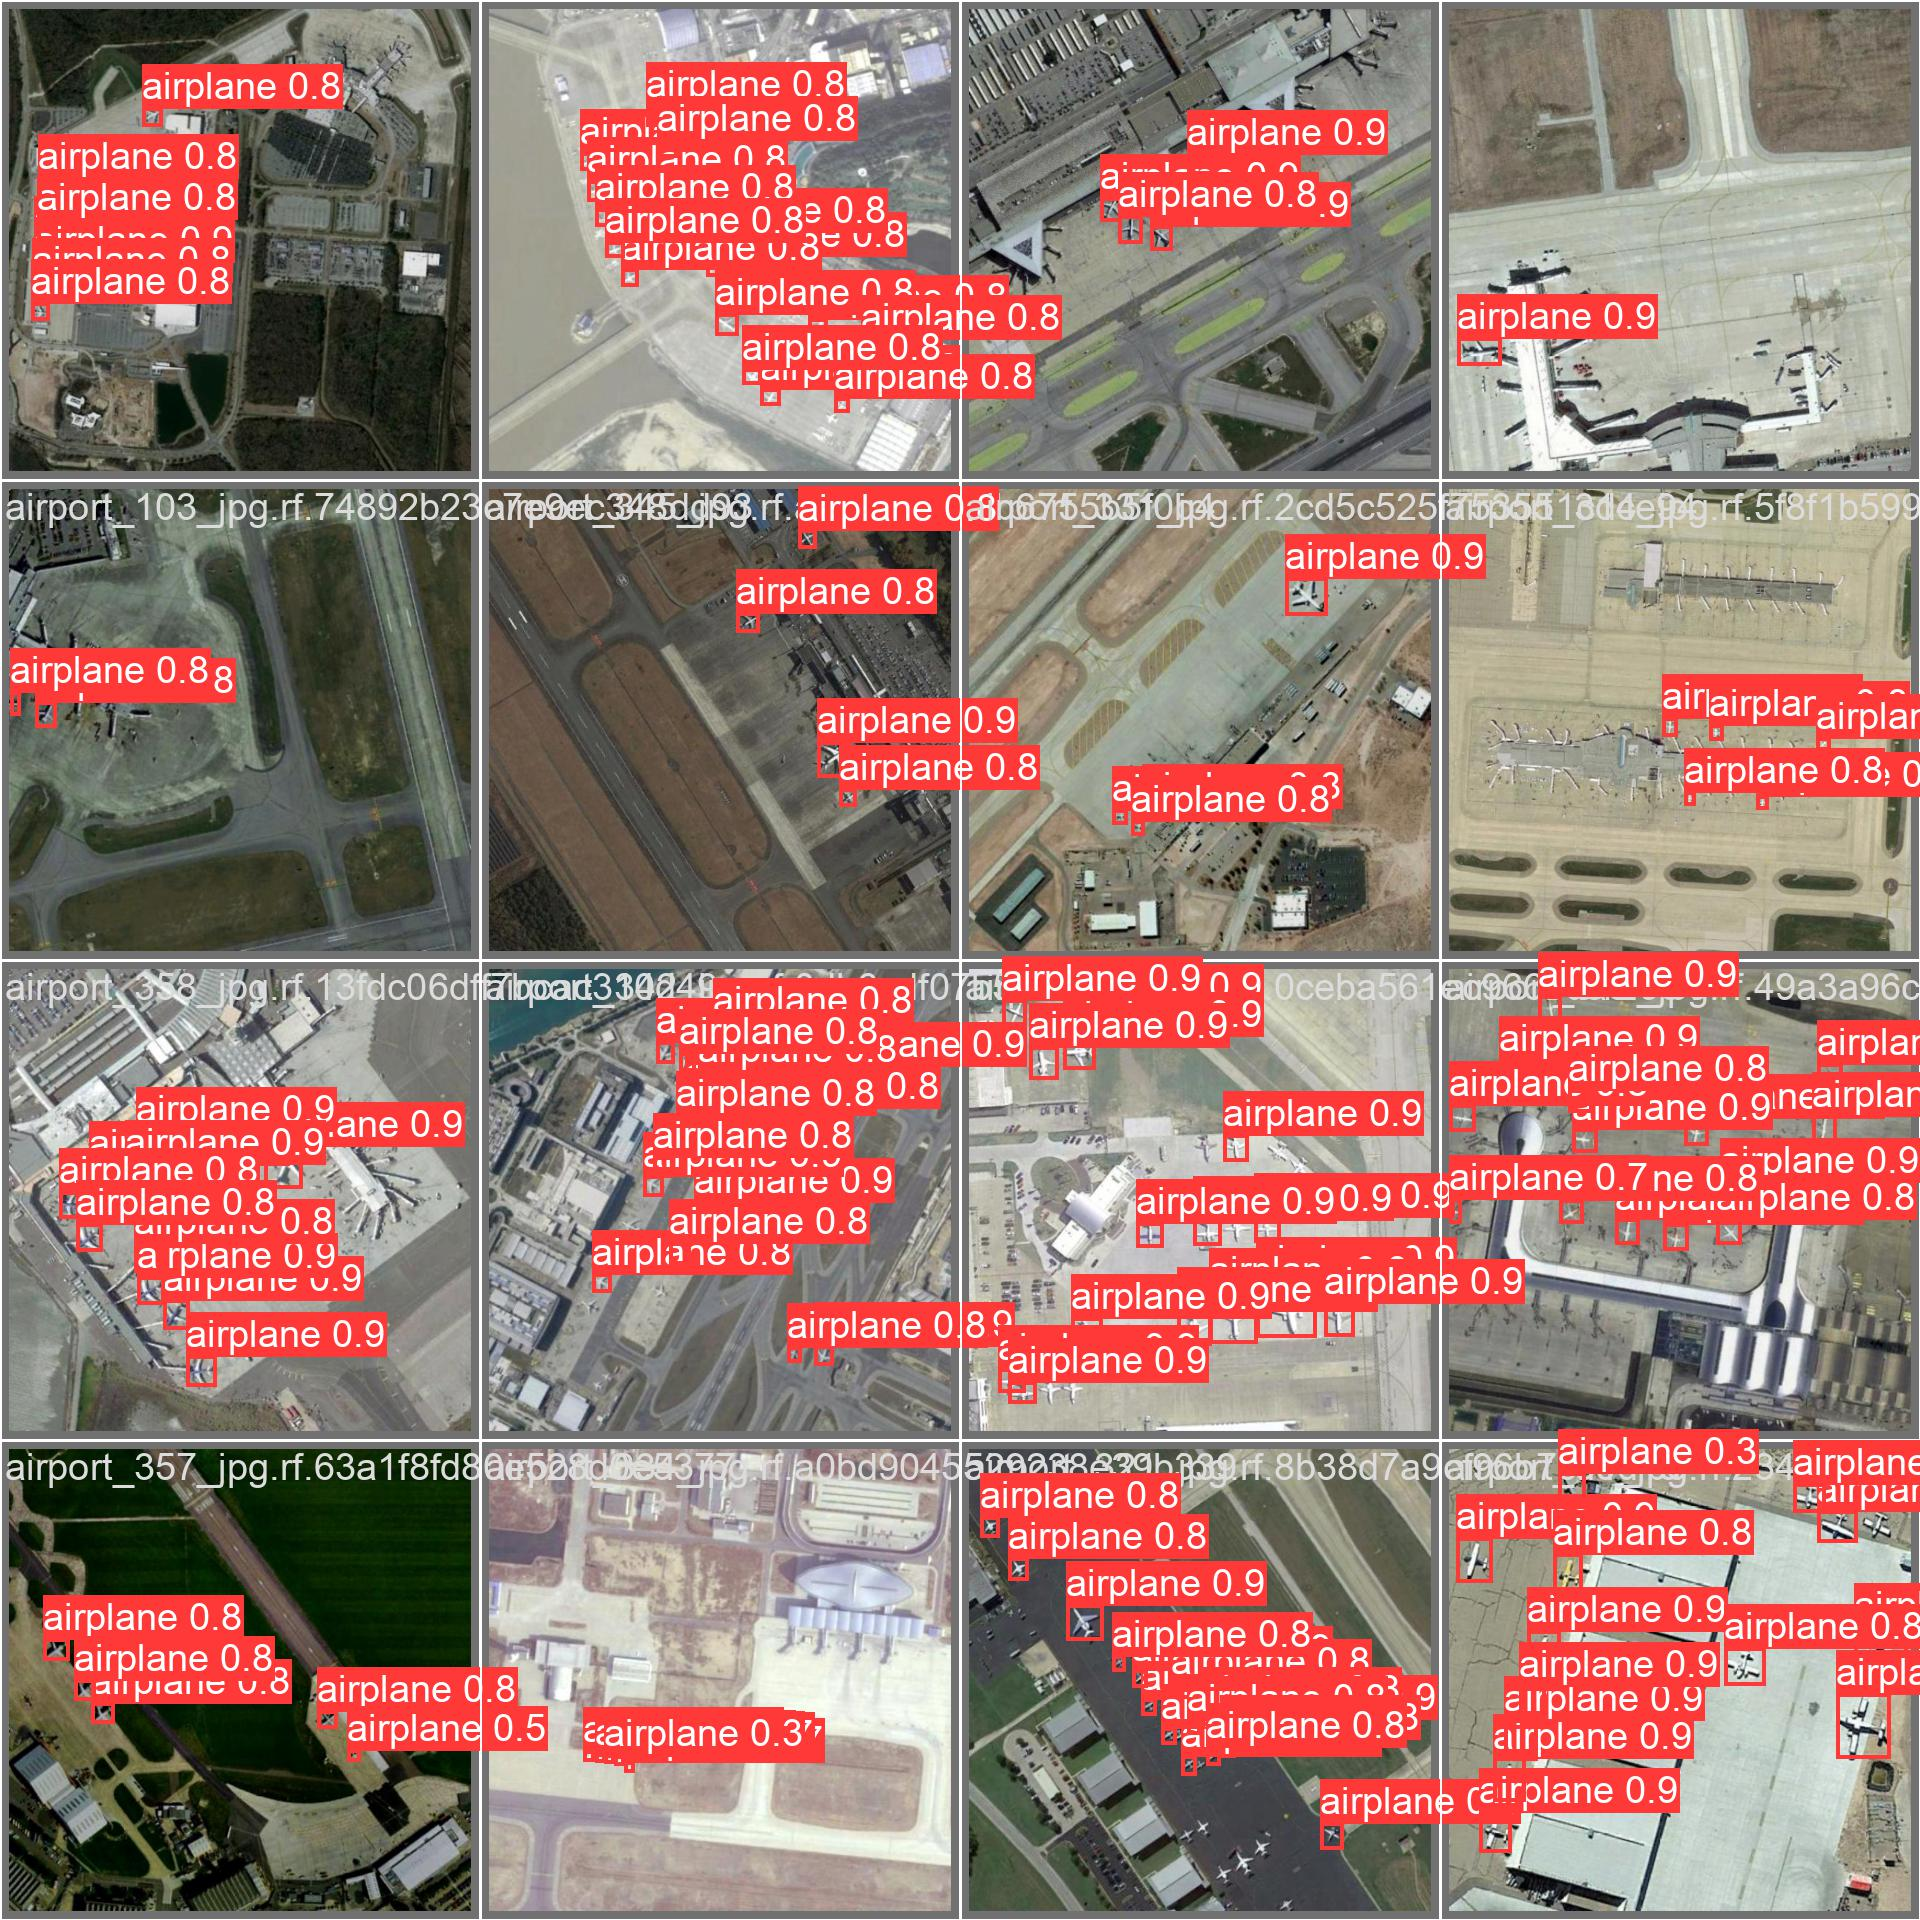

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-07-08 13:44:13.988668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 13:44:14.848875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Arial-Airport-planes-Detection-1/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:12<00:00,  2.44s/it]
                   all         73        901      0.967      0.937       0.98      0.668
Speed: 11.9ms 

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-07-08 13:44:42.314522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 13:44:43.198975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/40 /content/datasets/Arial-Airport-planes-Detection-1/test/images/airport_108_jpg.rf.8b390ba57ad19f8dc35486441765640e.jpg: 800x800 20 airplanes, 24.0ms
image 2/40 /content/datasets/Arial-Airport-planes-Detection-1/test/images/airport_11_jpg.rf.3997bb3b0f27732c95bc8a19ebd59f5e.jpg: 800x800 10 airplanes, 24.1ms
image 3/40 /content/datasets/Arial-Airport-planes-Detection-

**NOTE:** Let's take a look at few results.

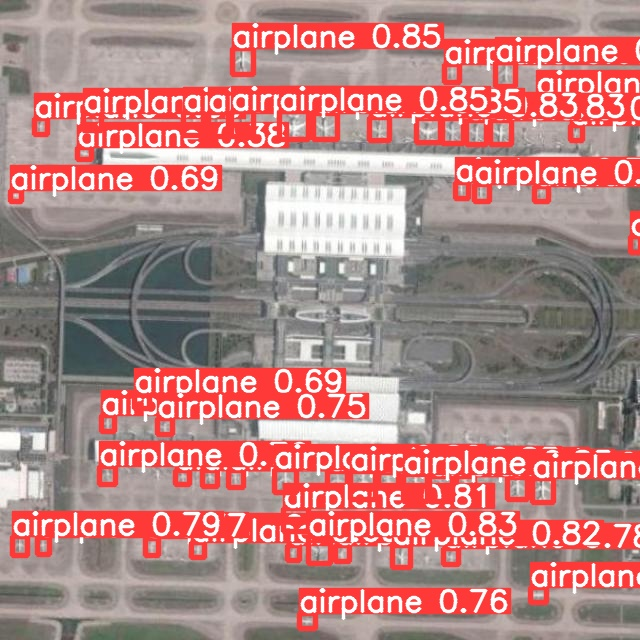

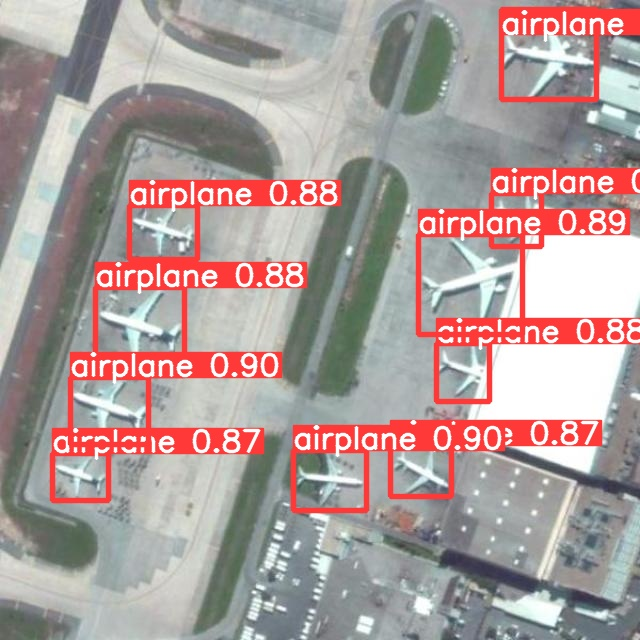

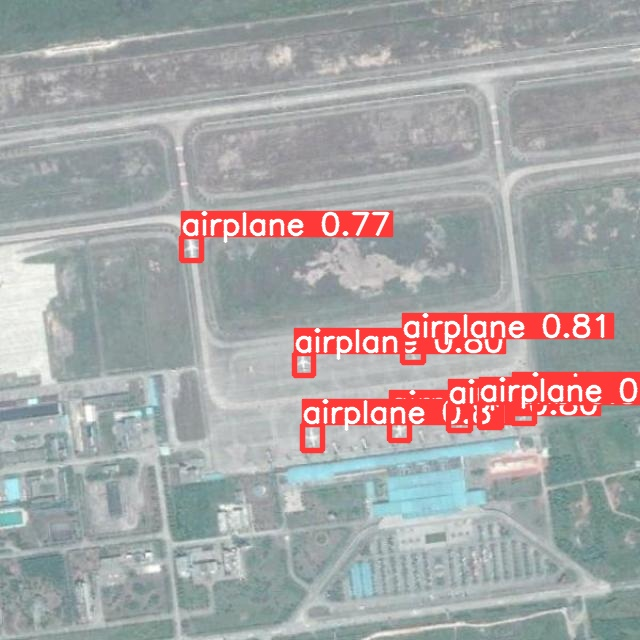

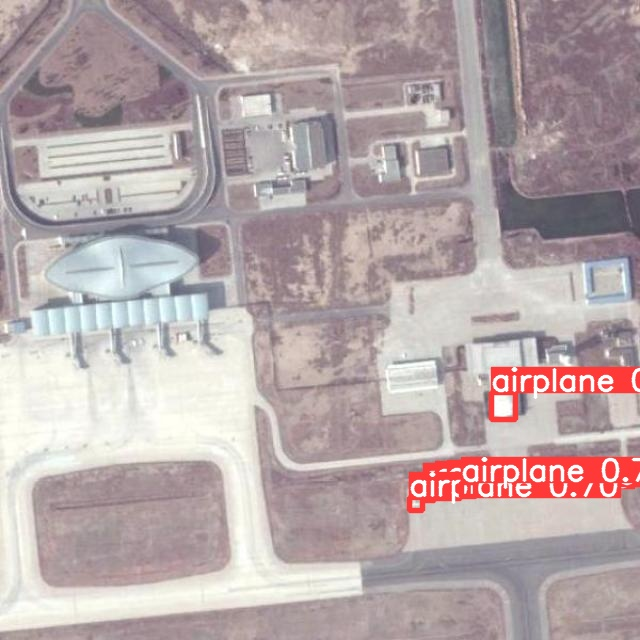

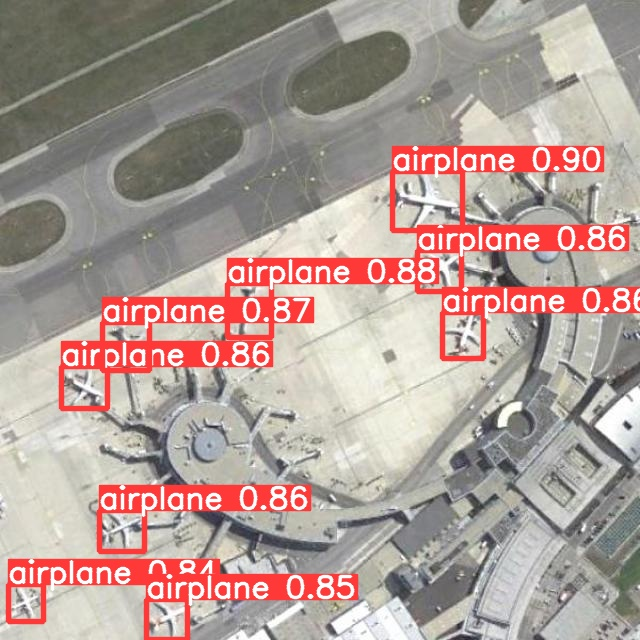

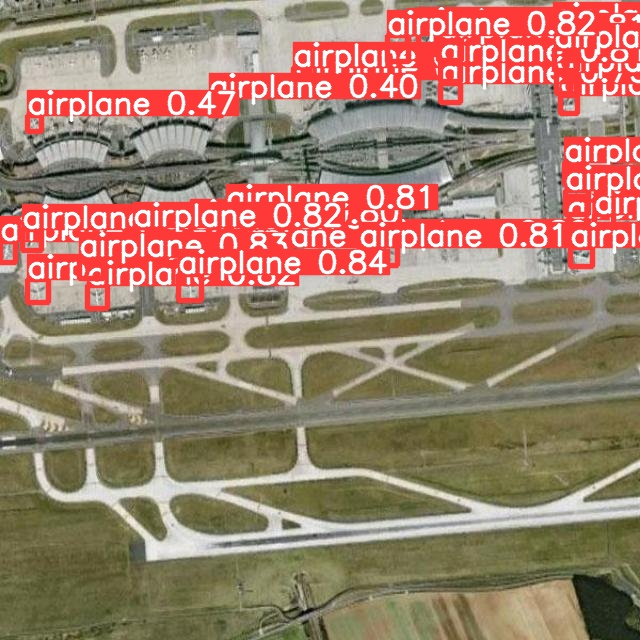

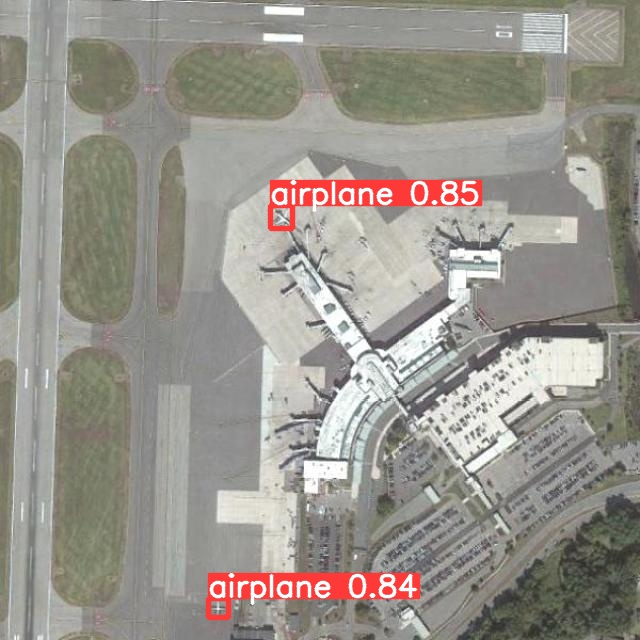

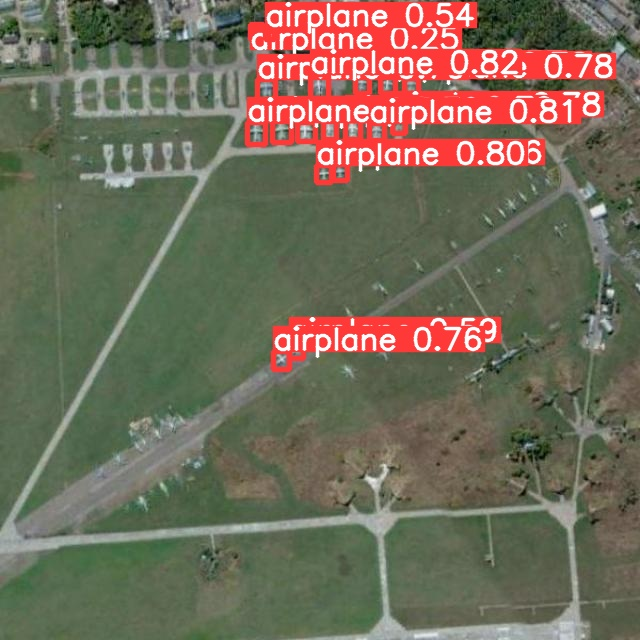

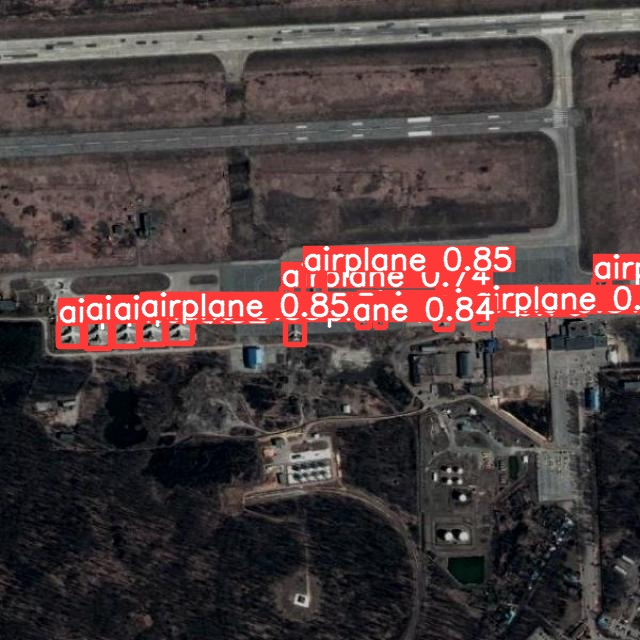

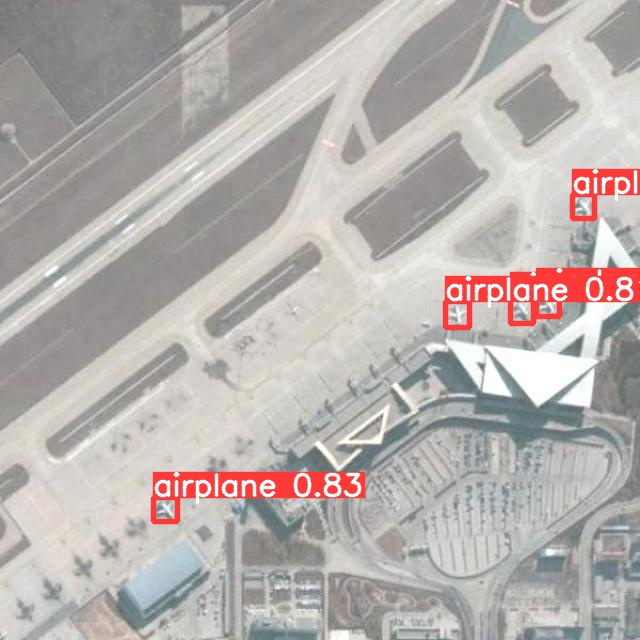

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
model = project.version(dataset.version).model
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)
pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on airport_84_jpg.rf.a720f1ac51c404fb98069f998889f566.jpg


{'predictions': [{'x': 281.5,
   'y': 217.0,
   'width': 23.0,
   'height': 24.0,
   'confidence': 0.8680314421653748,
   'class': 'airplane',
   'image_path': '/content/datasets/Arial-Airport-planes-Detection-1/test/images/airport_84_jpg.rf.a720f1ac51c404fb98069f998889f566.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 218.0,
   'y': 608.0,
   'width': 20.0,
   'height': 18.0,
   'confidence': 0.8439071774482727,
   'class': 'airplane',
   'image_path': '/content/datasets/Arial-Airport-planes-Detection-1/test/images/airport_84_jpg.rf.a720f1ac51c404fb98069f998889f566.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

In [ ]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/WhatsApp Video 2023-07-08 at 3.53.42 PM.mp4' save=True


2023-07-08 13:56:38.272591: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 13:56:39.147259: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
video 1/1 (1/613) /content/WhatsApp Video 2023-07-08 at 3.53.42 PM.mp4: 352x640 74.0ms
video 1/1 (2/613) /content/WhatsApp Video 2023-07-08 at 3.53.42 PM.mp4: 352x640 11.5ms
video 1/1 (3/613) /content/WhatsApp Video 2023-07-08 at 3.53.42 PM.mp4: 352x640 10.8ms
video 1/1 (4/613) /content/WhatsApp Video 2023-07-08 at 3.53.42 PM.mp4: 352x640 10.7ms
video 1/1 (5/613) /content/WhatsApp Vi

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
